In [1]:
import pandas as pd 
import numpy as np
from entropy_pooling import views
from entropy_pooling import entropy_minimizer
from entropy_pooling import markoviz_optimizer

In [2]:
data_raw = pd.read_excel("data.xlsx").dropna(axis=1, how='all')
weights = data_raw[["Weight"]]
scenarios = data_raw.drop(columns = ["Weight"])

In [3]:
(A,b,C,d) = views.load_debug();

KeyError: 0.0

In [4]:
c = 0.5
p = np.array(weights)
m,n = p.shape

posterior = entropy_minimizer.full_confidence_posterior(p, A,b,C,d)
weighted_posterior = entropy_minimizer.confidence_weighted_posterior(p, posterior, c)

NameError: name 'A' is not defined

In [ ]:
deltas, asset_names = markoviz_optimizer.load_asset_deltas("entropy_pooling/deltas.xlsx")

asset_scenarios = markoviz_optimizer.asset_scenarios(scenarios, deltas, asset_names)
asset_scenarios.head()

,Kesko,UPM,Fortum,Apple
0,3.742077,4.989436,7.592619,4.983188
1,-1.743102,-2.324136,-3.536729,1.468509
2,3.222797,4.297062,6.539008,8.579736
3,-2.270124,-3.026832,-4.606048,-3.290835
4,1.501175,2.001567,3.045863,4.251661


In [ ]:
matrix = np.matrix('1,0,0,0;0,1,0,0;0,0,1,0;0,0,0,1')
lb = np.array([0,0,0,0])
ub = np.array([0.5,1,1,1])

manual_constraints = (matrix, lb, ub)
manual_constraints = pd.read_excel("sample_portfolio1_constrs")

The optimization was succesful: True


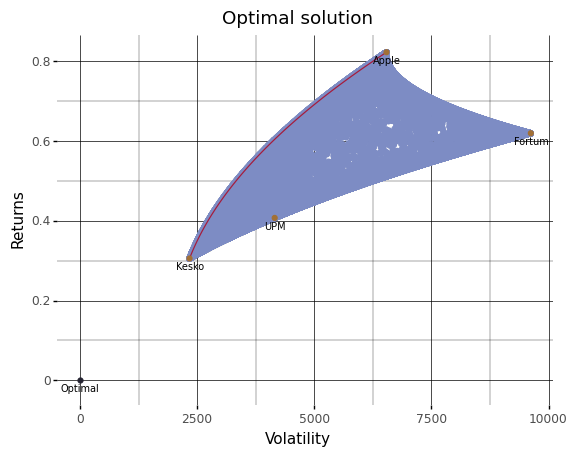

In [ ]:
#Optimization using prior weights
optimal_x = markoviz_optimizer.optimizer(asset_scenarios,
                                         weights,
                                         mu_0 = 0.5,
                                         manual_constraints = manual_constraints,
                                         allow_shorting = False,
                                         visualize = True,
                                         verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}%".format(col, np.round(optimal_x[i]*100,decimals = 1)))

The optimization was succesful: True
Kesko: 162.2% 
UPM: 60.2% 
Fortum: -152.6% 
Apple: 30.1% 


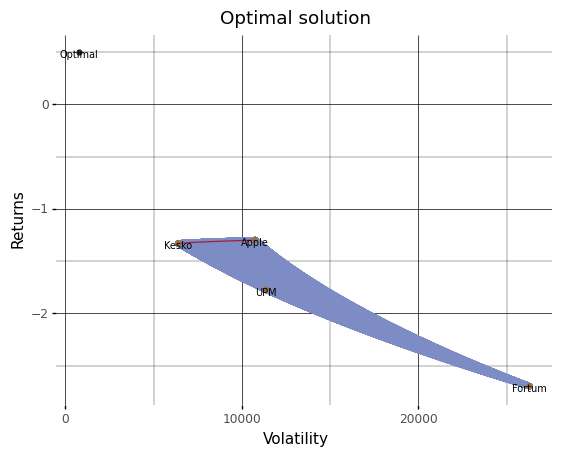

In [ ]:
#Optimization using posterior weights
optimal_x = markoviz_optimizer.optimizer(asset_scenarios,
                                         weighted_posterior,
                                         mu_0 = 0.5,
                                         allow_shorting = True,
                                         visualize = True,
                                         verbose = 1).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(asset_scenarios.columns):
  if abs(optimal_x[i]) > 0.001:
    print("{}: {}% ".format(col, np.round(optimal_x[i]*100,decimals = 1)))